<a href="https://colab.research.google.com/github/Chenjie-UTS/UTS_ML2019-ID12769194/blob/master/A2_YanXu_13506199.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
import csv


In [0]:
from pathlib import Path
DATA_URL = 'https://drive.google.com/open?id=1S4xFtrJ8nJRJLXmmGJaYB8aWDZMVfTkc'
DATA_FILENAME = "sydney-airbnb-open-data.zip"

data_dir = Path("./data/")
# Create dir structure if not existing
data_dir.mkdir(parents=True, exist_ok=True) 
filepath = data_dir / DATA_FILENAME

data_source = "Google Drive"  #@param ['Existing', 'Google Drive', 'NOAA/ERSL']
#@markdown --- 

if not filepath.exists():
    if data_source == 'Existing':
       raise ValueError("File doesn't exist, plese choose a source to get the file")
    elif data_source == "Google Drive":
        # Install the PyDrive wrapper & import libraries.
        # This only needs to be done once per notebook.
        !pip install -U -q PyDrive
        from pydrive.auth import GoogleAuth
        from pydrive.drive import GoogleDrive
        from google.colab import auth
        from oauth2client.client import GoogleCredentials

        # Authenticate and create the PyDrive client.
        # This only needs to be done once per notebook.
        auth.authenticate_user()
        gauth = GoogleAuth()
        gauth.credentials = GoogleCredentials.get_application_default()
        drive = GoogleDrive(gauth)

        # Download a file based on its file ID.
        #
        # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
        file_id = '1S4xFtrJ8nJRJLXmmGJaYB8aWDZMVfTkc'
        downloaded = drive.CreateFile({'id': file_id})
        downloaded.GetContentFile(str(filepath))
    elif data_source == "NOAA/ERSL":
        import urllib.request
        urllib.request.urlretrieve(DATA_URL, str(filepath))

In [0]:
import zipfile
zf = zipfile.ZipFile(filepath)
zf.extractall('./data/')
df = pd.read_csv(zf.open('listings_summary_dec18.csv'), encoding = "ISO-8859-1")

In [0]:
# Import listings_summary, load as pandas dataframe
listings_data = pd.read_csv('./data/listings_summary_dec18.csv')
#Create dataframe listings with relevant columns （ drop 'neigbourhood group' column as NULL）
listings = listings_data[['id','name','host_id','host_name','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']]

idlisting ID

namename of the listing

host_idhost ID

host_namename of the host

neighbourhood_grouplocation

neighbourhoodarea

latitudelatitude coordinates

longitudelongitude coordinates

room_typelisting space type

priceprice in dollars

minimum_nightsamount of nights minimum

number_of_reviewsnumber of reviews

last_reviewlatest review

reviews_per_monthnumber of reviews per month

calculated_host_listings_countamount of listing per host

availability_365number of days when listing is available for booking

In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 15 columns):
id                                36662 non-null int64
name                              36650 non-null object
host_id                           36662 non-null int64
host_name                         36656 non-null object
neighbourhood                     36662 non-null object
latitude                          36662 non-null float64
longitude                         36662 non-null float64
room_type                         36662 non-null object
price                             36662 non-null int64
minimum_nights                    36662 non-null int64
number_of_reviews                 36662 non-null int64
last_review                       24725 non-null object
reviews_per_month                 24725 non-null float64
calculated_host_listings_count    36662 non-null int64
availability_365                  36662 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 4

In [10]:
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12351,Sydney City & Harbour at the door,17061,Stuart,Sydney,-33.865153,151.191896,Private room,100,2,493,2018-11-21,4.83,2,187
1,14250,Manly Harbour House,55948,Heidi,Manly,-33.800929,151.261722,Entire home/apt,471,5,1,2016-01-02,0.03,2,321
2,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,Sydney,-33.880455,151.216541,Private room,109,2,300,2018-11-16,3.63,2,316
3,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,Leichhardt,-33.859072,151.172753,Entire home/apt,450,7,15,2018-01-07,0.18,1,69
4,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,Amanda,Woollahra,-33.889087,151.259404,Private room,62,1,42,2018-11-23,0.45,1,140


In [0]:
import sklearn as sk
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array
import datetime
#from sklearn.tree import DecisionTreeClassifier

In [12]:
label_encoder = LabelEncoder()
copylistings = listings.copy();

copylistings['price'] = copylistings['price'].astype(float)

#copylistings['lr_year'] = pd.DatetimeIndex(copylistings['last_review']).year
#copylistings['lr_month'] = pd.DatetimeIndex(copylistings['last_review']).month
#copylistings['lr_day'] = pd.DatetimeIndex(copylistings['last_review']).month

copylistings['rt_encode']= label_encoder.fit_transform(listings['room_type'])
copylistings['nbh_encode']= label_encoder.fit_transform(listings['neighbourhood'])

copylistings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rt_encode,nbh_encode
0,12351,Sydney City & Harbour at the door,17061,Stuart,Sydney,-33.865153,151.191896,Private room,100.0,2,493,2018-11-21,4.83,2,187,1,32
1,14250,Manly Harbour House,55948,Heidi,Manly,-33.800929,151.261722,Entire home/apt,471.0,5,1,2016-01-02,0.03,2,321,0,20
2,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,Sydney,-33.880455,151.216541,Private room,109.0,2,300,2018-11-16,3.63,2,316,1,32
3,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,Leichhardt,-33.859072,151.172753,Entire home/apt,450.0,7,15,2018-01-07,0.18,1,69,0,18
4,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,Amanda,Woollahra,-33.889087,151.259404,Private room,62.0,1,42,2018-11-23,0.45,1,140,1,37


In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(copylistings, test_size=0.2)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')


cols = ['number_of_reviews','rt_encode','nbh_encode','availability_365','minimum_nights','calculated_host_listings_count']
#normalized_copylistings[] = preprocessing.normalize(copylistings)
#normalizer = preprocessing.Normalizer().fit(cols)  # fit does nothing
#normalizer
#Normalizer(copy=True, norm='l1')

knn.fit(train_data[cols], train_data['price'])
predict_data = knn.predict(test_data[cols])

test_data['predict_data']= knn.predict(test_data[cols])

test_data.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rt_encode,nbh_encode,predict_data
9509,12142056,opposite RPAH,36517930,Cynthia,Sydney,-33.888865,151.180991,Entire home/apt,651.0,14,1,2016-06-18,0.03,1,0,0,32,101.8
12397,15481369,A Master room in summerhill,99387297,William,Ashfield,-33.887748,151.138539,Private room,37.0,2,0,NaN,NaN,1,0,1,0,51.4
32364,29292722,Brand New One Bed APT with garden view In Wate...,175776759,Bella,Sydney,-33.902405,151.213624,Entire home/apt,136.0,1,3,2018-11-23,3.00,18,76,0,32,157.2
19774,21257956,The Tree House,153715121,Gary,Sutherland Shire,-34.053439,151.033342,Private room,90.0,2,14,2018-10-01,1.11,1,172,1,31,222.8
36383,30536258,Spacious North Bondi Oasis - 1 Bedroom Apartment,16765619,Brendan,Waverley,-33.884287,151.273168,Entire home/apt,251.0,2,0,NaN,NaN,1,23,0,35,141.8


In [14]:
from sklearn.metrics import mean_squared_error
test_data['squared_error'] = (test_data['predict_data'] - test_data['price'])**(2)
mse = test_data['squared_error'].mean()
rmse = mse ** (1/2)
rmse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


325.36091333694486

In [15]:
print("RMSE for the {} column: {}".format('number_of_reviews',rmse))
print("RMSE for the {} column: {}".format('rt_encode',rmse))
print("RMSE for the {} column: {}".format('nbh_encode',rmse))
print("RMSE for the {} column: {}".format('availability_365',rmse))
print("RMSE for the {} column: {}".format('minimum_nights',rmse))
print("RMSE for the {} column: {}".format('calculated_host_listings_count',rmse))



RMSE for the number_of_reviews column: 325.36091333694486
RMSE for the rt_encode column: 325.36091333694486
RMSE for the nbh_encode column: 325.36091333694486
RMSE for the availability_365 column: 325.36091333694486
RMSE for the minimum_nights column: 325.36091333694486
RMSE for the calculated_host_listings_count column: 325.36091333694486


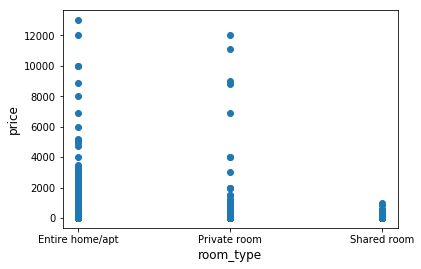

In [28]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['room_type'], y = train_data['price'])
plt.ylabel('price', fontsize=12)
plt.xlabel('room_type', fontsize=12)
plt.show()

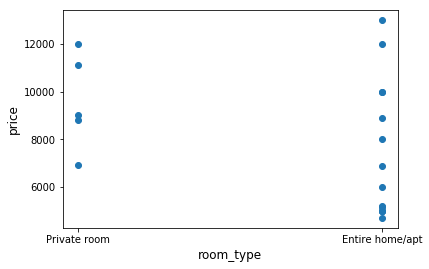

In [35]:
#Deleting outliers
train_data = train_data.drop(train_data[(train_data['price']<4000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train_data['room_type'], train_data['price'])
plt.ylabel('price', fontsize=12)
plt.xlabel('room_type', fontsize=12)
plt.show()


 mu = 7884.40 and sigma = 2703.09



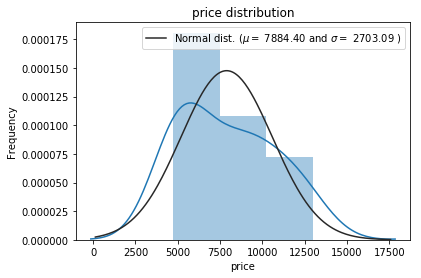

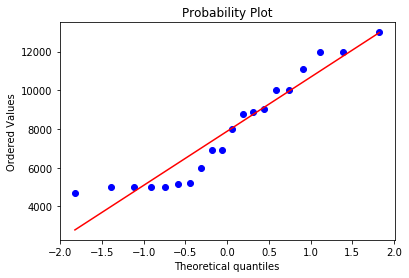

In [39]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(train_data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['price'], plot=plt)
plt.show()

In [57]:
#check the data sheet
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [58]:
#descriptive statistics summary
df['price'].describe()

count    36662.000000
mean       207.689597
std        323.818795
min          0.000000
25%         80.000000
50%        136.000000
75%        223.000000
max      14999.000000
Name: price, dtype: float64

(-0.5, 92.5, 0, 12000)

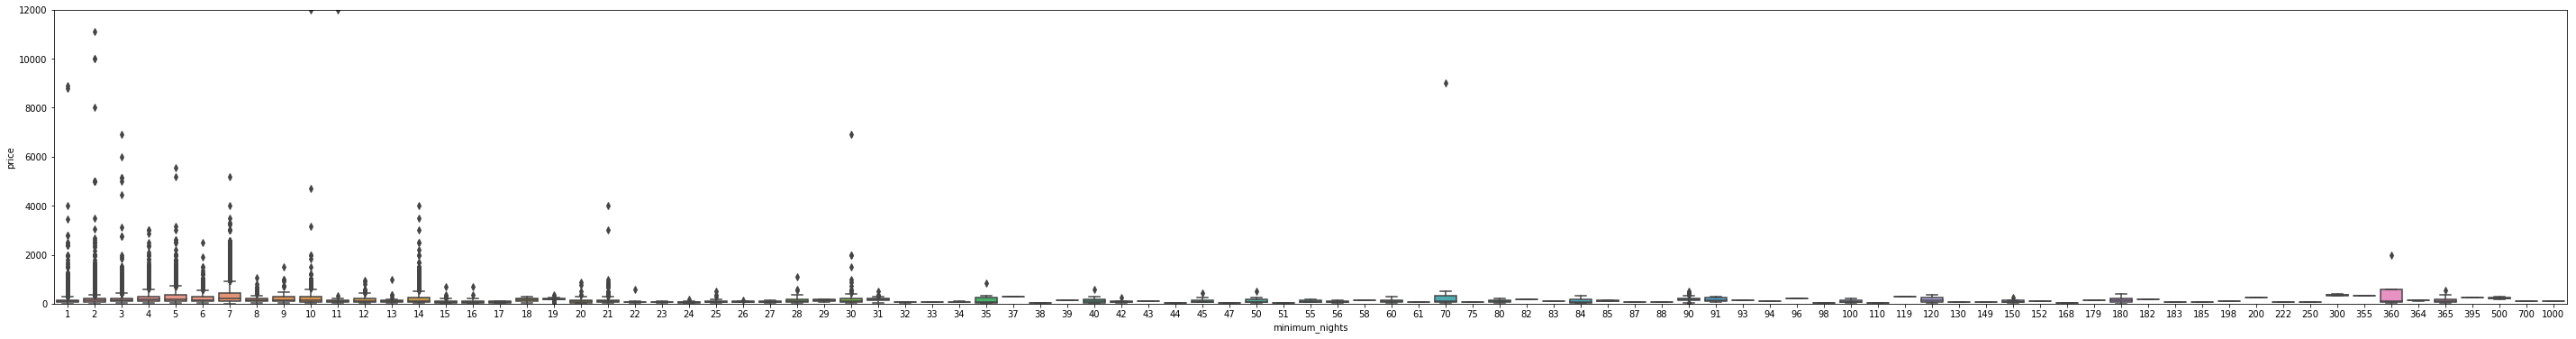

In [76]:
#box plot minimum_nights/price
var = 'minimum_nights'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(50,6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=12000)